In [15]:
import numpy
import matplotlib.pyplot

In [16]:
f=open("out.data","rb")
buffer=f.read()
f.close()
x=numpy.array(numpy.frombuffer(buffer,dtype=numpy.float64))

In [17]:
itn=x.shape[0]//2
m=numpy.diag(x[1:itn+1])
for i in range(itn-1):
    m[i,i+1]=x[itn+1+i]
    m[i+1,i]=x[itn+1+i]

[e,v]=numpy.linalg.eigh(m)
c=x[0]*v[0,:]

In [18]:
ep=-15+numpy.arange(4501)*0.01
sp=numpy.zeros(4501)
ga=0.125
for i in range(itn):
    sp=sp+0.5*ga*c[i]*c[i]/(0.25*ga*ga+(e[i]-ep)*(e[i]-ep))

In [19]:
f=open("sp_12.data","rb") #nodify the file name of the reference spectrum
buffer=f.read()
f.close()
spref=numpy.frombuffer(buffer,dtype=numpy.float64)

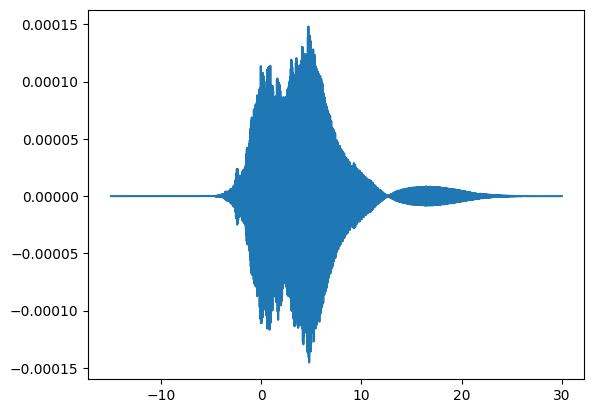

In [20]:
matplotlib.pyplot.plot(ep,sp-spref)
#matplotlib.pyplot.xlim([-6,-5])

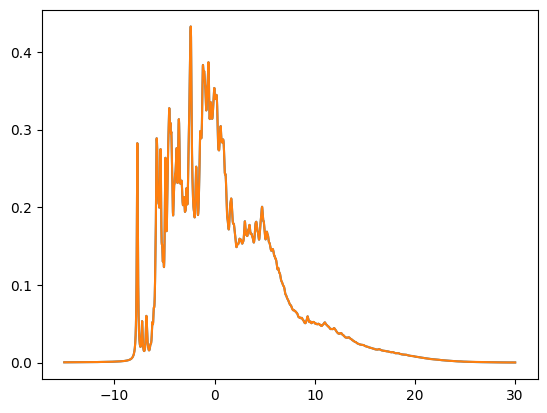

In [21]:
matplotlib.pyplot.plot(ep,spref,ep,sp)
#matplotlib.pyplot.xlim([-6,-5])